In [1]:
import nltk
import pyquran as q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
quran_df = pd.read_csv('Quran.csv')
suwar_df = pd.read_csv("Suwar.csv")

In [8]:
quran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Aya Text          6236 non-null   object
 1   Sura Number       6236 non-null   int64 
 2   Sura Name         6236 non-null   object
 3   Aya Number        6236 non-null   int64 
 4   Number of Ayat    6236 non-null   int64 
 5   Aya Words         6236 non-null   object
 6   Aya Word Count    6236 non-null   int64 
 7   Aya Letter Count  6236 non-null   int64 
 8   Aya Sequ Order    6236 non-null   int64 
 9   Order             6236 non-null   int64 
 10  Sura Name EN      6236 non-null   object
 11  Place             6236 non-null   object
 12  Note              3559 non-null   object
dtypes: int64(7), object(6)
memory usage: 633.5+ KB


In [9]:
suwar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sura Number        114 non-null    int64 
 1   Sura Name AR       114 non-null    object
 2   Sura Text          114 non-null    object
 3   Number of Ayat     114 non-null    int64 
 4   Sura Words         114 non-null    object
 5   Sura Word Count    114 non-null    int64 
 6   Sura Letter Count  114 non-null    int64 
 7   Order              114 non-null    int64 
 8   Sura Name EN       114 non-null    object
 9   Place              114 non-null    object
 10  Note               41 non-null     object
dtypes: int64(5), object(6)
memory usage: 9.9+ KB


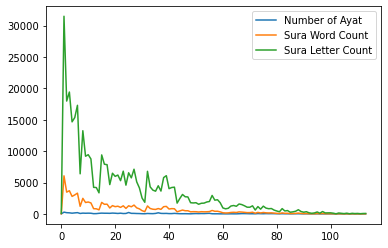

In [3]:
suwar_df['Number of Ayat'].plot(kind='line') 
suwar_df['Sura Word Count'].plot(kind='line') 
suwar_df['Sura Letter Count'].plot(kind='line')
plt.legend()

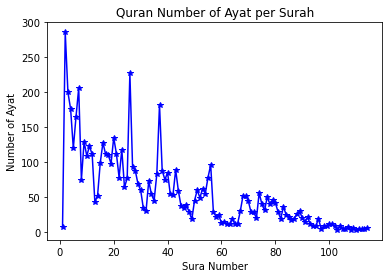

In [4]:
plt.plot(suwar_df['Sura Number'], suwar_df['Number of Ayat'], 'b-*')
plt.xlabel('Sura Number')
plt.ylabel('Number of Ayat')
plt.title('Quran Number of Ayat per Surah')
plt.show()

<AxesSubplot:xlabel='Place', ylabel='count'>

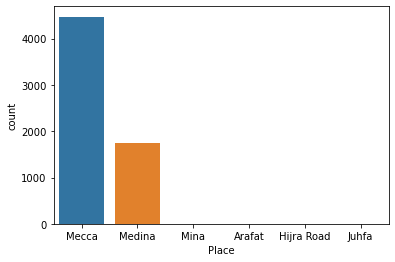

In [25]:
sns.countplot(x='Place',data=quran_df)

C:\Users\msanh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msanh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msanh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msanh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msanh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msanh\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

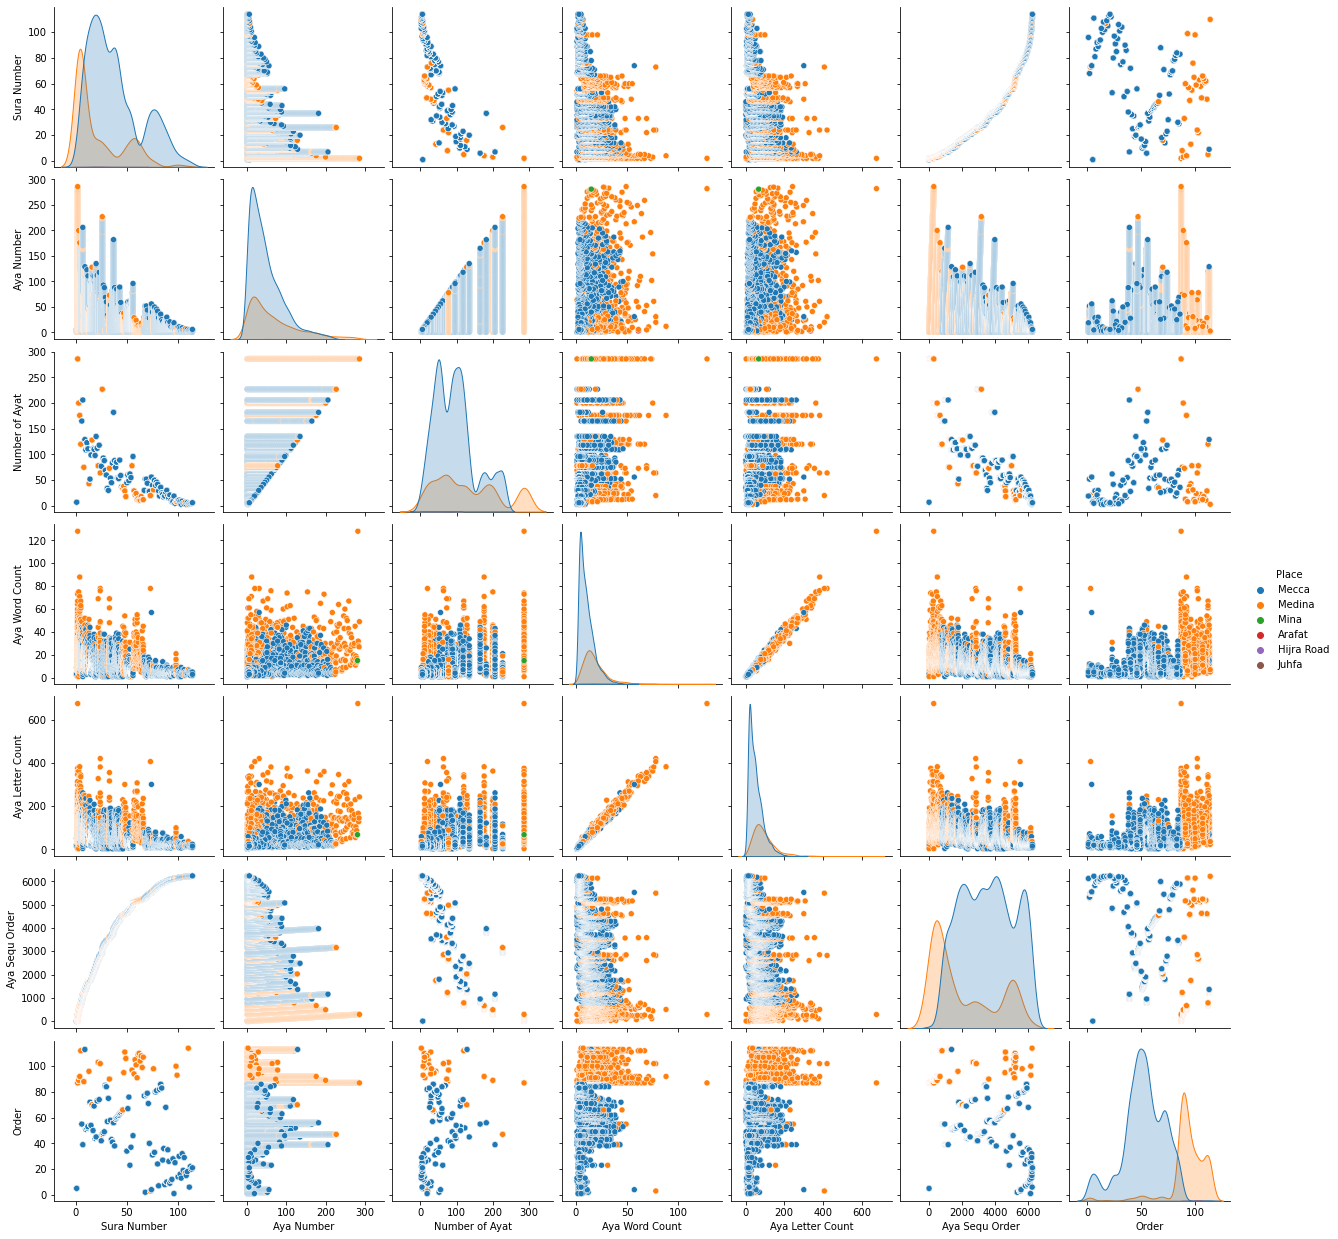

In [26]:
sns.pairplot(quran_df,hue='Place')

array([[<AxesSubplot:title={'center':'Aya Letter Count'}>]], dtype=object)

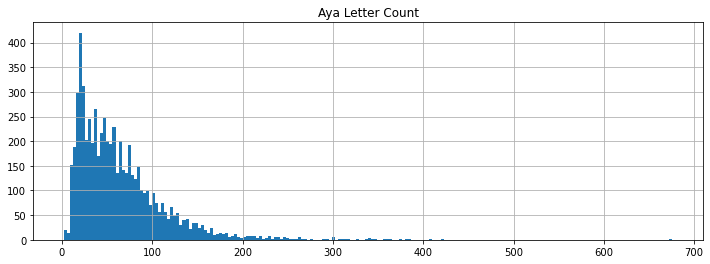

In [27]:
quran_df.hist(column='Aya Letter Count', bins=200,figsize=(12,4))

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
count_vector = CountVectorizer()
aya_bow_transformer = count_vector.fit(quran_df['Aya Text'])
sura_bow_transformer = count_vector.fit(quran_df['Aya Text'])
# Print total number of vocab words
print(len(aya_bow_transformer.vocabulary_))

14789


In [34]:
aya4 = quran_df['Aya Text'][1]
print(aya4)

الحمد لله رب العلمين


In [35]:
bow4 = aya_bow_transformer.transform([aya4])
print(bow4)
print(bow4.shape)

  (0, 1967)	1
  (0, 2319)	1
  (0, 5497)	1
  (0, 9184)	1
(1, 14789)


In [38]:
print(aya_bow_transformer.get_feature_names()[1967])
print(aya_bow_transformer.get_feature_names()[9184])

الحمد
لله


In [39]:
ayah_bow = aya_bow_transformer.transform(quran_df['Aya Text'])

In [40]:
print('Shape of Sparse Matrix: ', ayah_bow.shape)
print('Amount of Non-Zero occurences: ', ayah_bow.nnz)

Shape of Sparse Matrix:  (6236, 14789)
Amount of Non-Zero occurences:  73383


In [41]:
sparsity = (100.0 * ayah_bow.nnz / (ayah_bow.shape[0] * ayah_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07957021781396996


In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(ayah_bow)

In [43]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9184)	0.4517457870521441
  (0, 5497)	0.4434266693490936
  (0, 2319)	0.5067515921880662
  (0, 1967)	0.5852361545611038


In [44]:
ayah_tfidf = tfidf_transformer.transform(ayah_bow)
print(ayah_tfidf.shape)

(6236, 14789)


In [46]:
from sklearn.naive_bayes import MultinomialNB
MeMa_detect_model = MultinomialNB().fit(ayah_tfidf, quran_df['Place'])

In [48]:
print('predicted:', MeMa_detect_model.predict(tfidf4)[0])
print('expected:', quran_df.Place[3])

predicted: Mecca
expected: Mecca


In [50]:
from sklearn.model_selection import train_test_split

aya_train, aya_test, label_train, label_test = \
train_test_split(quran_df['Aya Words'], quran_df['Place'], test_size=0.2)

print(len(aya_train), len(aya_test), len(aya_train) + len(aya_test))

4988 1248 6236


In [52]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [53]:
pipeline.fit(aya_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [54]:
predictions = pipeline.predict(aya_test)

In [71]:
from sklearn.metrics import classification_report
print (classification_report(label_test, predictions))

              precision    recall  f1-score   support

  Hijra Road       0.00      0.00      0.00         2
       Mecca       0.81      0.97      0.88       882
      Medina       0.85      0.45      0.59       364

    accuracy                           0.81      1248
   macro avg       0.55      0.47      0.49      1248
weighted avg       0.82      0.81      0.79      1248



C:\Users\msanh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msanh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msanh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [64]:
pipeline.fit(aya_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [65]:
predictions = pipeline.predict(aya_test)

In [69]:
print (classification_report(label_test, predictions))

              precision    recall  f1-score   support

  Hijra Road       0.00      0.00      0.00         2
       Mecca       0.81      0.97      0.88       882
      Medina       0.85      0.45      0.59       364

    accuracy                           0.81      1248
   macro avg       0.55      0.47      0.49      1248
weighted avg       0.82      0.81      0.79      1248



C:\Users\msanh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msanh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msanh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
